In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.shape

(144, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# converting month column dtype form object to int

df['Month']=pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df.index

RangeIndex(start=0, stop=144, step=1)

In [8]:
df.set_index('Month',inplace=True)

In [9]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

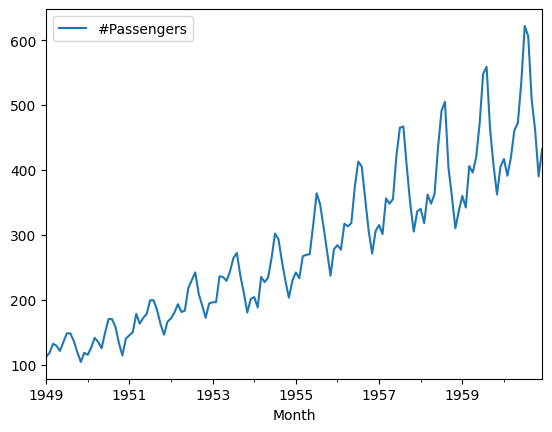

In [10]:
df.plot()

In [11]:
# it contains +ve trend, seasonality, multiplicative pattern

# now we have to see if our data is stationary or not
# two methods to check stationary-- 1: Adfuller(if p-value<0.05) --2: Kpss(if p-value>0.05)
# use any one
# here we will use Adfuller

In [12]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['#Passengers'])
pval=result[1]
pval

0.991880243437641

In [13]:
# pvalue>0.05 --so we will now make our data statitionary by removing trend and seasonality

In [14]:
# here we will detrend the data by using rolling mean with window=12

In [15]:
rolling_mean=df.rolling(window=12).mean()
rolling_mean_detrended=df-rolling_mean
rolling_mean_detrended[:13]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


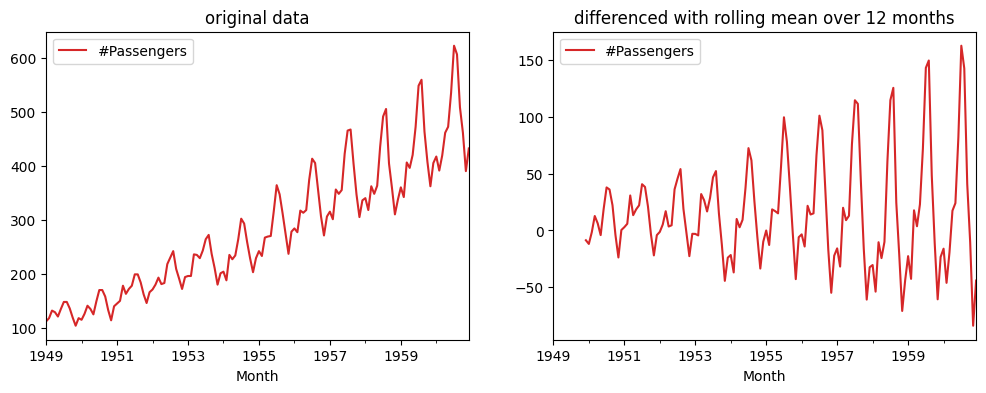

In [16]:
ax1=plt.subplot(1,2,1)
df.plot(figsize=(12,4), color="tab:red", title='original data', ax=ax1)

ax2=plt.subplot(1,2,2)
rolling_mean_detrended.plot(figsize=(12,4),color='tab:red',
                            title="differenced with rolling mean over 12 months", ax=ax2)

plt.show()

In [17]:
# trend is gone but seasonality is there

rolling_mean_detrended_diff=rolling_mean_detrended-rolling_mean_detrended.shift()

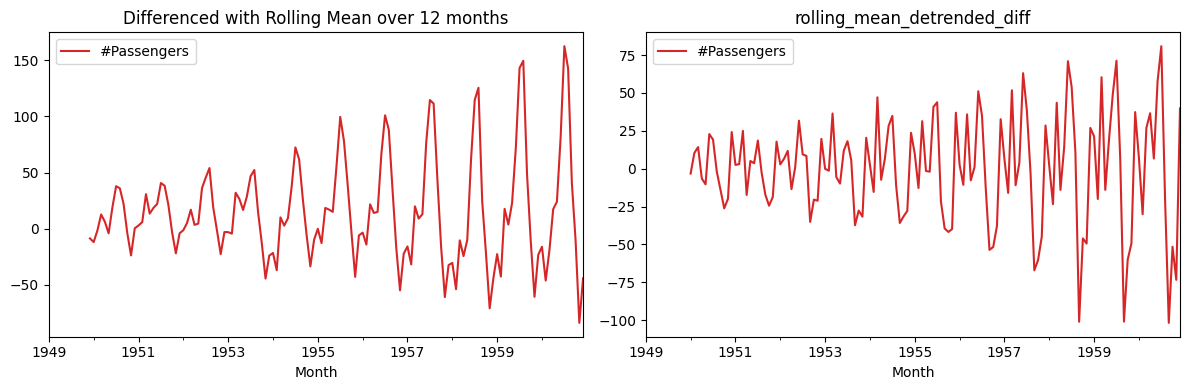

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

rolling_mean_detrended.plot(color="tab:red", title='differenced with rolling mean over 12 months', ax=ax1)
ax1.set_title('Differenced with Rolling Mean over 12 months')

rolling_mean_detrended_diff.plot(color="tab:red", title='rolling_mean_detrended_diff', ax=ax2)
ax2.set_title('rolling_mean_detrended_diff')

plt.tight_layout()
plt.show()

In [19]:
# dropping null value and checking our data is stationary or not with adfuller

rolling_mean_detrended_diff.dropna(inplace=True)

In [20]:
result=adfuller(rolling_mean_detrended_diff['#Passengers'])
result[1]

0.022775264967859258

In [21]:
# now pvalue<0.05 so # now we got our data without trend and stationarity

In [22]:
m=rolling_mean_detrended_diff.rolling(window=12).mean()
s=rolling_mean_detrended_diff.rolling(window=12).std()

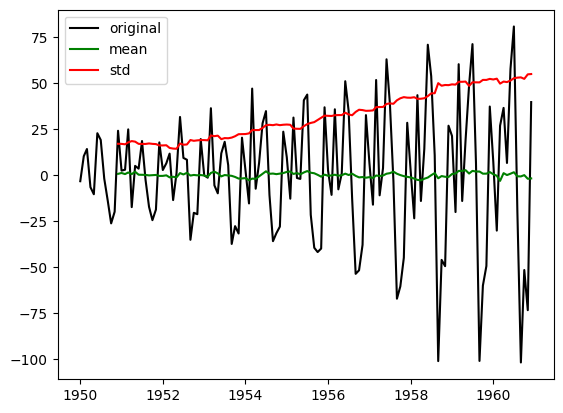

In [23]:
plt.plot(rolling_mean_detrended_diff,color='black',label='original')
plt.plot(m,color='green',label='mean')
plt.plot(s,color='red',label='std')
plt.legend(loc='best')
plt.show()


In [24]:
! pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00


In [25]:
order=auto_arima(rolling_mean_detrended_diff['#Passengers'])
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -610.892
Date:                Fri, 05 Apr 2024   AIC                           1235.785
Time:                        09:47:29   BIC                           1255.964
Sample:                    01-01-1950   HQIC                          1243.985
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8644      0.162      5.346      0.000       0.548       1.181
ar.L2          0.2042      0.230      0.889      0.374      -0.246       0.654
ar.L3         -0.5267      0.140     -3.773      0.000      -0.800      -0.253
ma.L1         -0.9136      0.128     -7.154      0.000      -1.164      -0.663
ma.L2         -0.8209      0.168     -4.884      0.000      -1.150      -0.491
ma.L3          0.7468      0.095      7.850      0.000       0.560       0.933
sigma2       586.1896     67.804      8.645      0.000     453.297     719.082
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.72   Prob(JB):                         0.28
Heteroskedasticity (H):               6.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# importing acf and pacf graph

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

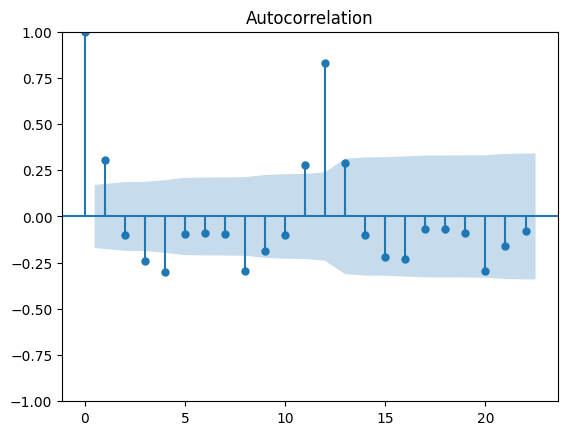

In [27]:
plot_acf(rolling_mean_detrended_diff);

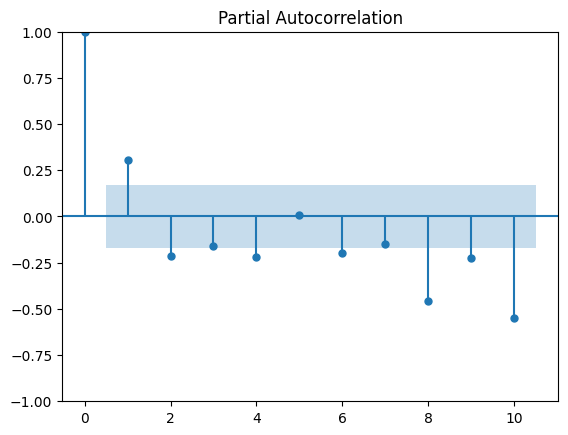

In [31]:
plot_pacf(rolling_mean_detrended_diff,lags=10);

In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [61]:
train=rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test=rolling_mean_detrended_diff.iloc[120:]['#Passengers']

In [62]:
# building model
model=ARIMA(train,order=(3,0,3))

# fit the data
model_fit=model.fit()

#predict the data
rolling_mean_detrended_diff['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

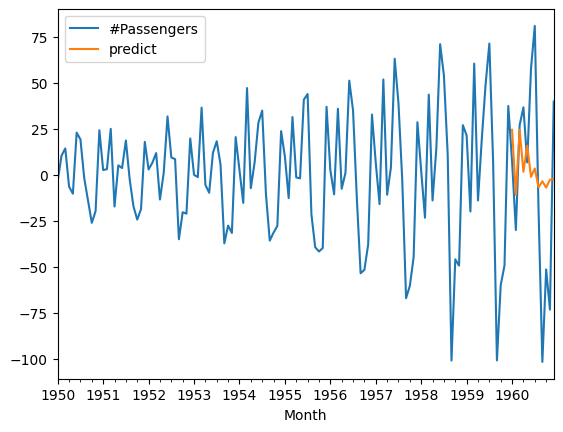

In [63]:
# plotting the prediction and the original

rolling_mean_detrended_diff[['#Passengers','predict']].plot()

In [64]:
# prediction not upto mark so i will use SARIMAX model because of the remaining seasonality

# importing SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
model=SARIMAX(train,order=(3,0,3),seasonal_order=(3,0,3,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
rolling_mean_detrended_diff['pred']=model.predict(start=len(train),end=len(train)+len(test)-1)

<Axes: xlabel='Month'>

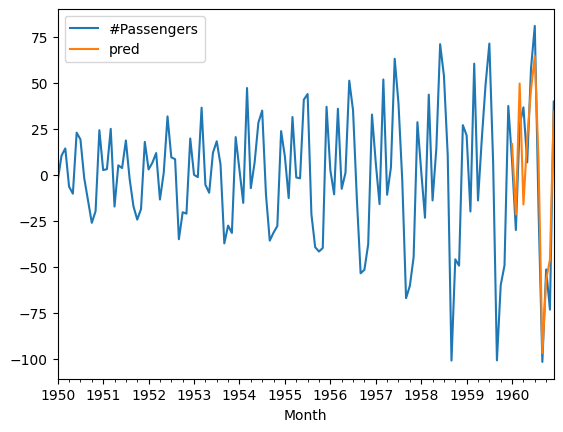

In [68]:
# plotting prediction and original

rolling_mean_detrended_diff[['#Passengers','pred']].plot()

<Axes: xlabel='Month'>

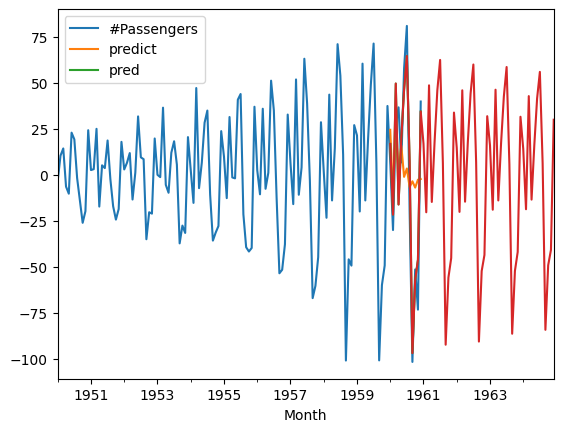

In [70]:
# trying to forecast next 60 months with SARIMAX

forecast=model.forecast(steps=60)
rolling_mean_detrended_diff.plot()
forecast.plot()